Social Media Analysis - Instagram 

In [ ]:
# !pip install nltk
# nltk.download('all')

In [28]:
#importations
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#reading in dataset and checking columns
insta = pd.read_excel("instagram.xlsx")
insta.columns
# insta.isna()

Index(['title', 'content', 'from', 'location', 'date', 'images', 'url',
       'device', 'hits', 'likes', 'comments'],
      dtype='object')

In [31]:
#converting all column types to strings 
for column in insta:
  insta[column] = insta[column].astype('string')

In [32]:
#dropping columns and separating date and time columns 
new_insta = insta.drop(["title", "location", "hits", "url", "device", "device", "images"], axis = 1)
new_insta[['Date', 'Time']] = new_insta.date.str.split(" ", expand = True)
insta = new_insta.drop(["date", "Time"], axis = 1)
insta.head()

,content,from,likes,comments,Date
0,The FIFA World Cup Qatar 2022™ kicks off today...,vivo_global,430.0,8,2022-11-20
1,� FIFA World Cup Qatar 2022™ is only 3 days aw...,hisense_international,161.0,66,2022-11-17
2,The FIFA World Cup Qatar 2022™ kicks off in 3 ...,vivo_global,662.0,11,2022-11-17
3,The FIFA World Cup Qatar 2022™ is one week awa...,hisensesports,74.0,2,2022-11-12
4,We are 10 days away from the FIFA World Cup Qa...,hisensesports,46.0,3,2022-11-10


In [33]:
# basic stats
insta[["likes", "comments"]].describe()

,likes,comments
count,7624,7634
unique,1014,276
top,3.0,0
freq,778,4177


In [34]:
#sorting by date (for timeline)
sorted_insta = insta.sort_values(by=["Date"])
sorted_insta.head()
sorted_insta.tail()

,content,from,likes,comments,Date
7080,The United States' Special Advisor on Internat...,gulftimes,39.0,0,2023-01-26
7084,Qatar’s FIFA World Cup journey was showcased d...,gulftimes,9.0,0,2023-01-26
7083,The Doha Declaration issued by the high-level ...,gulftimes,55.0,2,2023-01-27
7082,The Department of Communication and Public Rel...,gulftimes,4.0,0,2023-01-27
7079,The Visit Qatar GKA Freestyle Kite World Cup 2...,gulftimes,4.0,0,2023-01-30


In [38]:
sorted_insta = insta.sort_values(by=["likes"], ascending=False)
sorted_insta.head()

,content,from,likes,comments,Date
7430,"Welcome to Perspective, our monthly series hig...",humanrightswatch,994.0,123,2022-11-30
4939,�� C R O A T I A �� Croatia takes third place...,phetru,991.0,4,2022-12-18
7364,"For many fans, the unofficial soundtrack of th...",abcnews_au,990.0,10,2022-11-26
2824,2022 FIFA World Cup: The dust has now settle...,sani_thatsportsguy,99.0,113,2022-12-20
2145,Are you ready for today’s third match? Poland...,east.mojo,99.0,0,2022-11-26


In [48]:
#converting to date-time and floating point 
insta['likes'] = insta['likes'].astype(float)
insta['comments'] = insta['comments'].astype(int)
insta['Date'] = pd.to_datetime(insta['Date'], format="%Y/%m/%d")
# insta.dtypes

In [50]:
sorted_insta_likes = insta.sort_values(by="likes", ascending=False)
sorted_insta_likes.head()

,content,from,likes,comments,Date
7419,World Cup final � cruzbeckham roadto2022en #f...,davidbeckham,2552193.0,6812,2022-12-18
7143,Vamos leomessi ❤️�.Sizce bugün Dünya Kupasını ...,cznburak,1704190.0,6054,2022-12-18
7146,Güzel insan davidbeckham ile beraberiz❤️.Sizce...,cznburak,1599746.0,4415,2022-12-11
7546,Can't wait for this great World Cup semi-final...,m10_official,1589392.0,10354,2022-12-15
7420,Thank you for an unforgettable visit and a Wor...,iamzlatanibrahimovic,1337540.0,2992,2022-12-22


In [51]:
sorted_insta_comments = insta.sort_values(by="comments", ascending=False)
sorted_insta_comments.head()

,content,from,likes,comments,Date
7426,A pitch invader carrying a rainbow flag brough...,cnn,517036.0,20473,2022-11-29
7546,Can't wait for this great World Cup semi-final...,m10_official,1589392.0,10354,2022-12-15
7421,American journalist Grant Wahl has died in Qat...,cnn,164963.0,7375,2022-12-10
7419,World Cup final � cruzbeckham roadto2022en #f...,davidbeckham,2552193.0,6812,2022-12-18
7143,Vamos leomessi ❤️�.Sizce bugün Dünya Kupasını ...,cznburak,1704190.0,6054,2022-12-18


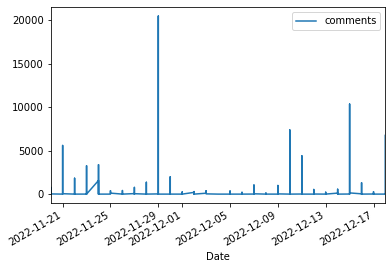

In [15]:
insta.plot(x="Date", y="comments")
plt.xlim(["2022-11-20", "2022-12-18"])
plt.show()

In [ ]:
#stop words 
nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words("english"))